#                                              Project Data Mining


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import os

In [2]:
os.chdir('C:\\Users\\kirti\\Downloads')

## Problem Statement 1: Clustering

In [3]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

#### Solution 1.1

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.shape

(210, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
dups = df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

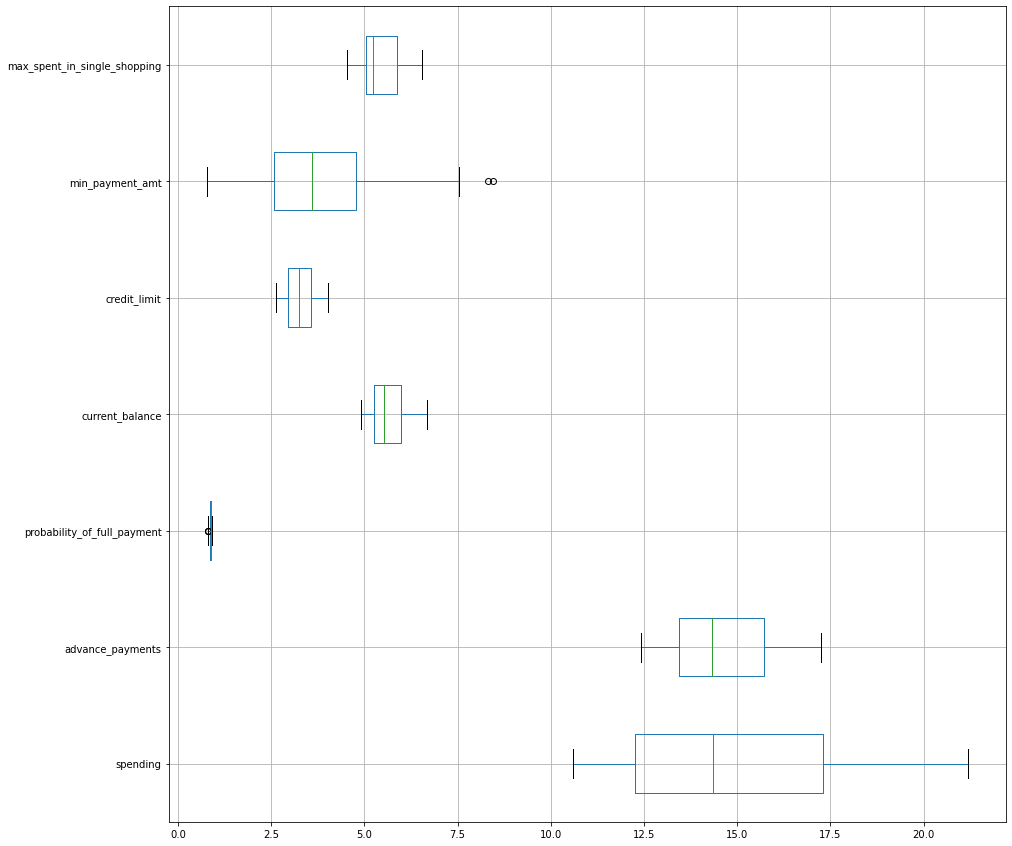

In [11]:
plt.figure(figsize=(15,15))
df.boxplot(vert=0)

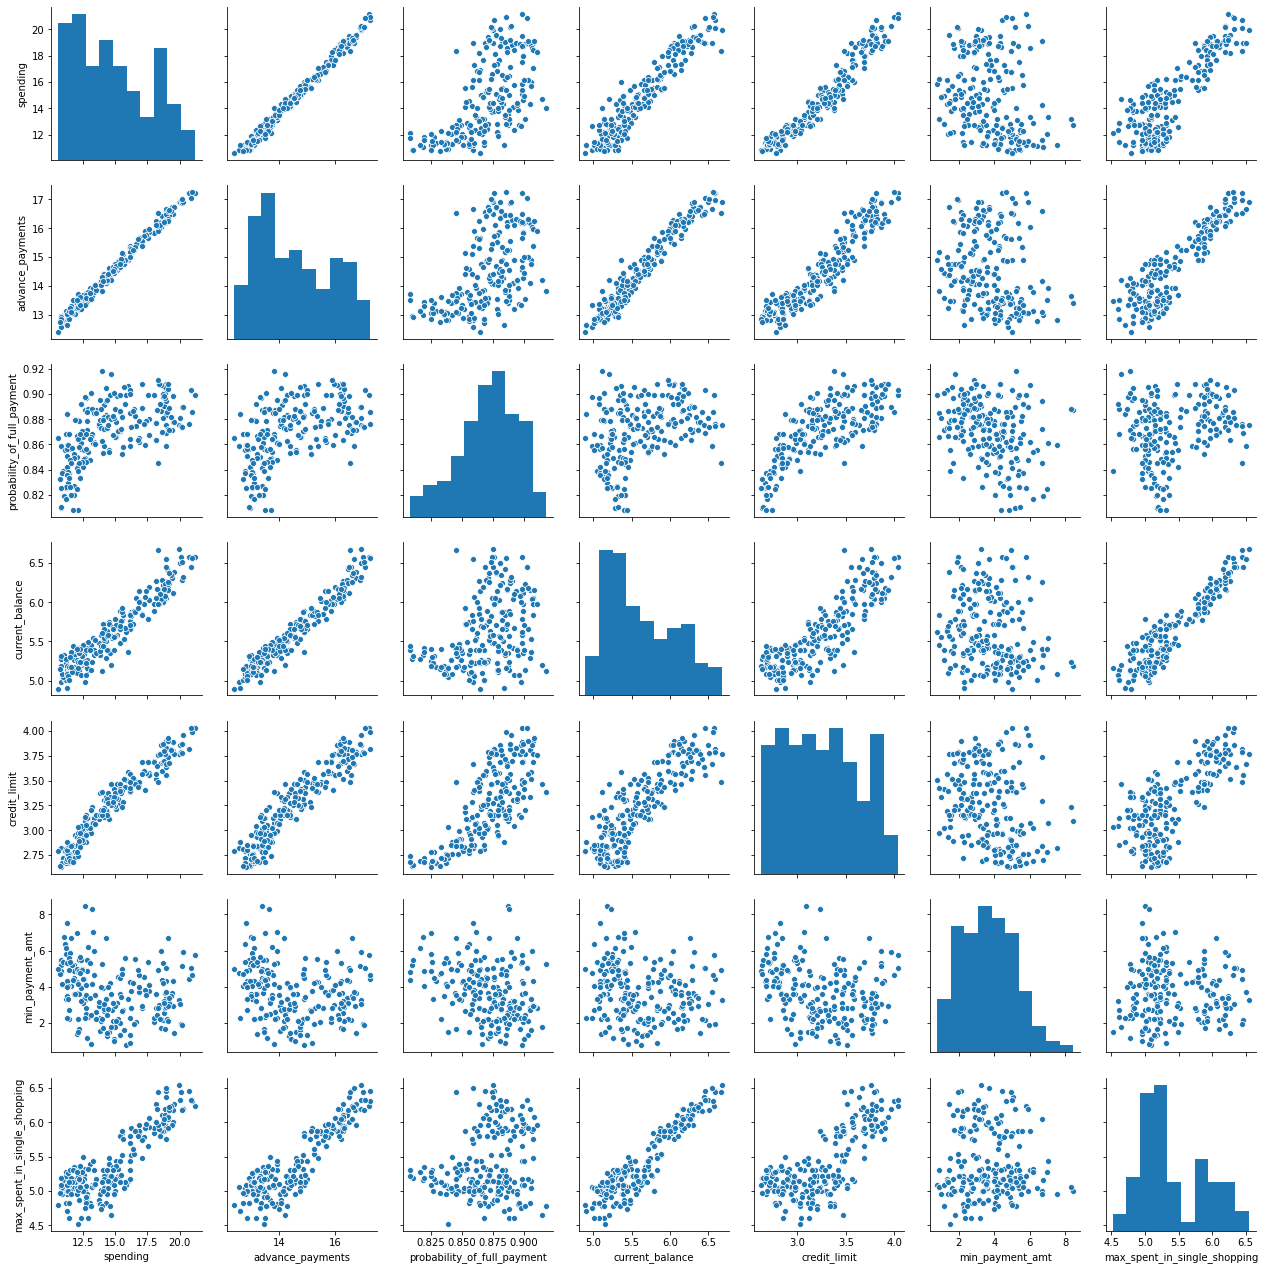

In [12]:
sns.pairplot(df)

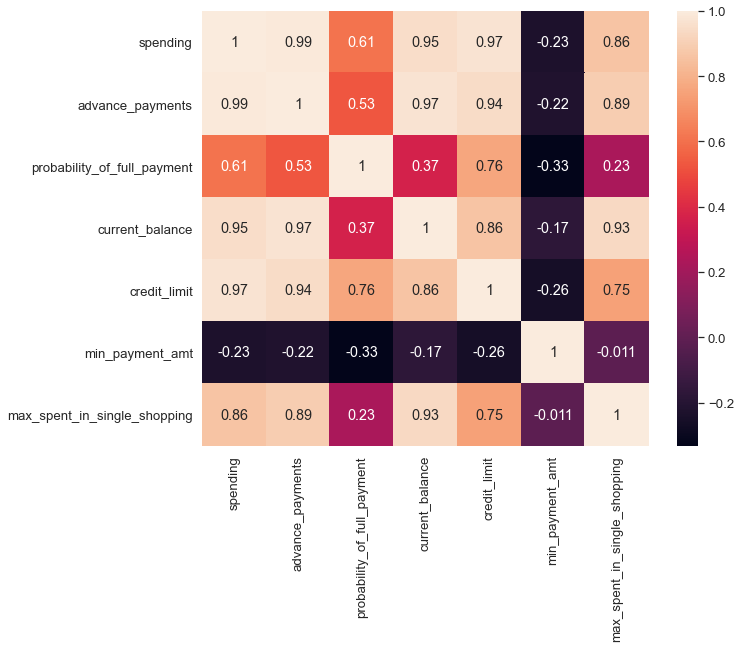

In [14]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)

#### Solution 1.2

In [23]:
from scipy.stats import zscore


In [24]:
df1=df.copy()

In [25]:
df1= df1.apply(zscore)
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


#### Solution 1.3

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [27]:
df1_hclust = linkage(df1, method = 'ward')

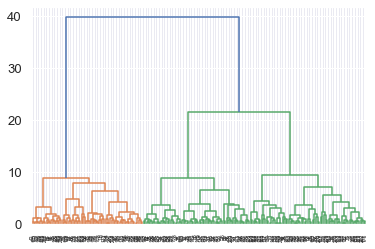

In [28]:
dend = dendrogram(df1_hclust)

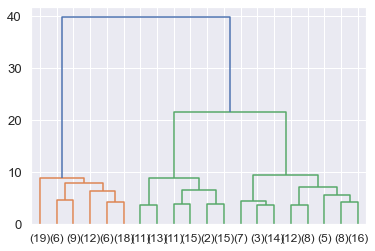

In [29]:
dend = dendrogram(df1_hclust,
                 truncate_mode='lastp',
                 p = 20,
                 )

In [32]:
#Method 1

clustersM = fcluster(df1_hclust, 2, criterion='maxclust')
clustersM

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [33]:
# Method 2

clustersD = fcluster(df1_hclust, 20, criterion='distance')
clustersD

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [34]:
df1['clusters_M'] = clustersM
df1['clusters_D'] = clustersD

In [35]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_M,clusters_D
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1,1


In [36]:
df1.clusters_M.value_counts().sort_index()


1     70
2    140
Name: clusters_M, dtype: int64

In [37]:
df1.clusters_D.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters_D, dtype: int64

In [38]:
df1.to_csv('PDMhc.csv')

#### Solution 1.4

### Forming clusters with K = 1,2,3,4,5,6 and comparing the WSS

In [40]:
from sklearn.cluster import KMeans

In [41]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df1)
k_means.inertia_

1659.6238095238089

In [43]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df1)
k_means.inertia_

709.530653081785

In [44]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1)
k_means.inertia_

441.5649333542433

In [45]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1)
k_means.inertia_

391.2639073834157

In [46]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1)
k_means.inertia_

348.90445200200776

In [47]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df1)
k_means.inertia_

304.8113455240418

##### Calculating WSS for other values of K - Elbow Method

In [48]:
wss=[]

In [49]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [50]:
wss

[1659.6238095238089,
 709.530653081785,
 441.5649333542433,
 391.35367863747916,
 343.4988235195685,
 304.856900331223,
 280.8329596484087,
 253.0619451504626,
 232.06842709280676,
 214.81153624155047]

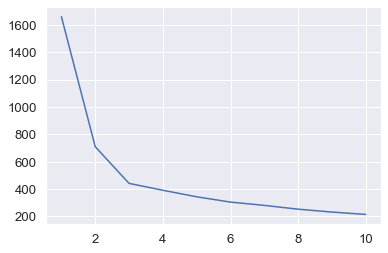

In [51]:
plt.plot(range(1,11), wss)

In [57]:
k_means = KMeans(n_clusters = 3, random_state=1)
k_means.fit(df1)
labels = k_means.labels_

In [58]:
df1["df1_Kmeans"] = labels
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_M,clusters_D,df1_Kmeans
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1,1,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2,3,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1,1,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2,2,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1,1,1


In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [59]:
# Calculating silhouette_score K=3
silhouette_score(df1,labels,random_state=1)

0.5233213805469301

In [60]:
# Calculating silhouette_score K=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.4291310228936575

###### Silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3.

#### Solution 2.1

## Problem Statement2: CART-RF-ANN

In [3]:
CRA = pd.read_csv('insurance_part2_data.csv')

In [4]:
CRA.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
CRA.shape

(3000, 10)

In [6]:
CRA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
CRA.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [8]:
CRA.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [9]:
for feature in CRA.columns: 
    if CRA[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(CRA[feature].unique()))
        print(pd.Categorical(CRA[feature].unique()).codes)
        CRA[feature] = pd.Categorical(CRA[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [10]:
#Compairing the unique counts from above
print('Agency_Code \n', CRA.Agency_Code.value_counts())
print('\n')
print('Type \n', CRA.Type.value_counts())
print('\n')
print('Claimed \n', CRA.Claimed.value_counts())
print('\n')
print('Channel \n', CRA.Channel.value_counts())
print('\n')
print('Destination \n', CRA.Destination.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


In [12]:
CRA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [11]:
CRA.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [13]:
#Proportion of Target Variable
print(CRA.Claimed.value_counts())
print('%1s',924/(924+2076))
print('%0s',2076/(924+2076))

0    2076
1     924
Name: Claimed, dtype: int64
%1s 0.308
%0s 0.692


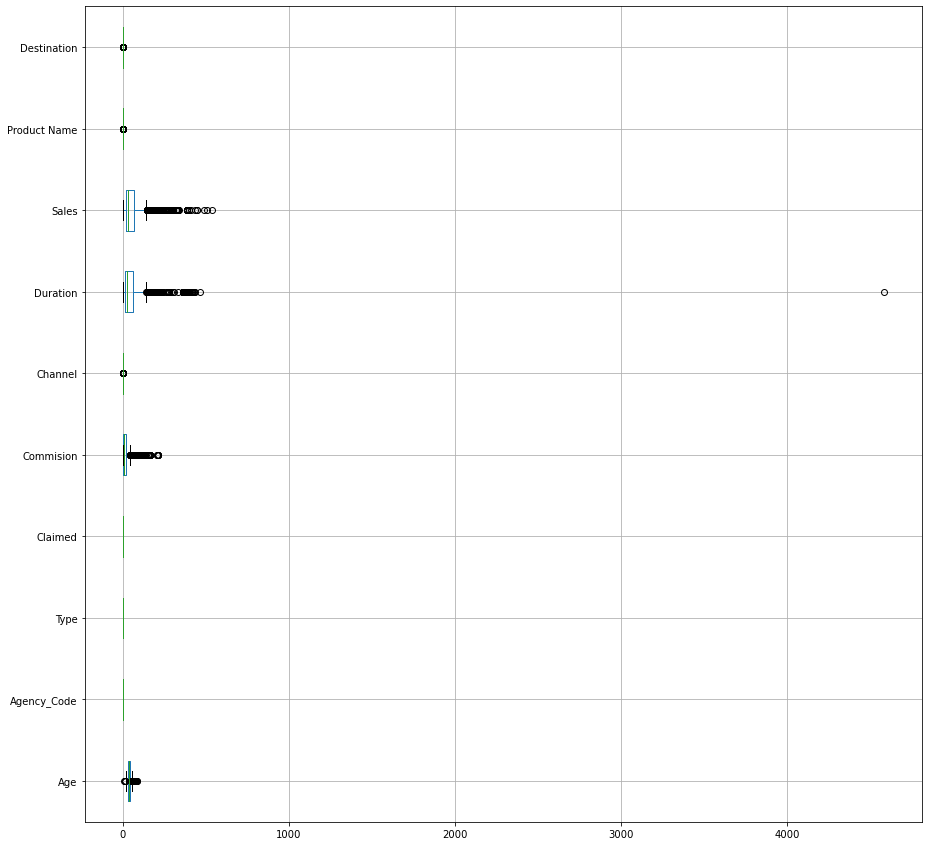

In [14]:
plt.figure(figsize=(15,15))
CRA.boxplot(vert=0)

In [15]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)


    return lower_range, upper_range

In [16]:
for feature in CRA[['Duration']]: 
    lr,ur=treat_outlier(CRA[feature])
    CRA[feature]=np.where(CRA[feature]>ur,ur,CRA[feature])
    CRA[feature]=np.where(CRA[feature]<lr,lr,CRA[feature])

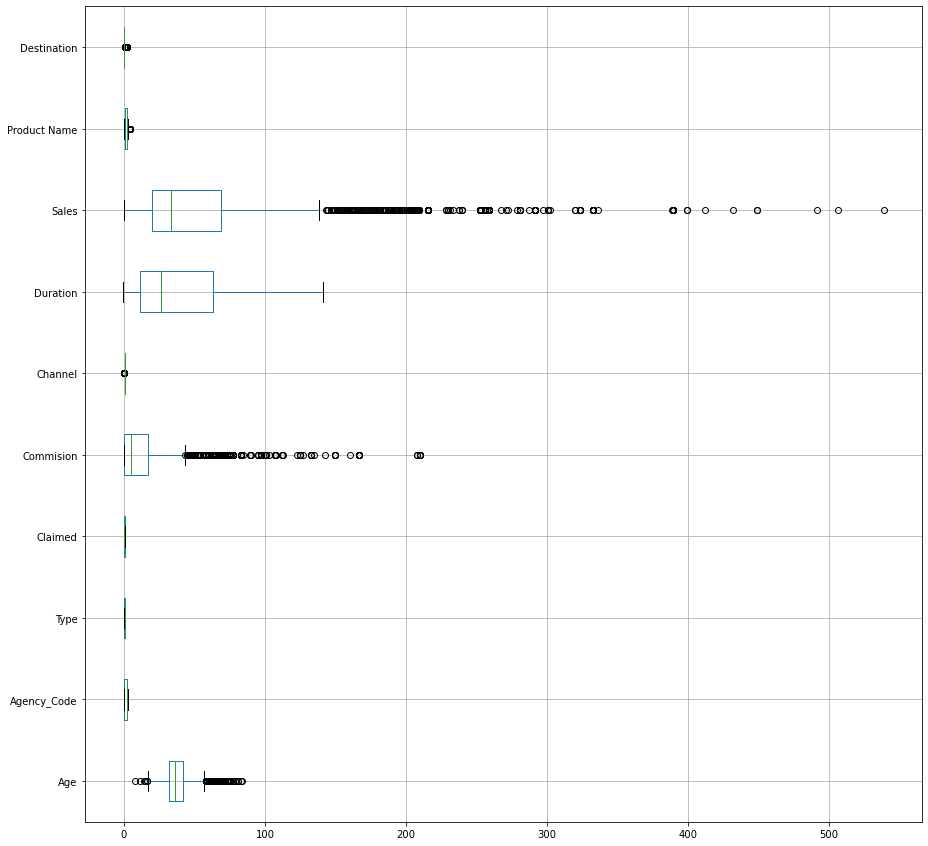

In [17]:
plt.figure(figsize=(15,15))
CRA.boxplot(vert=0)

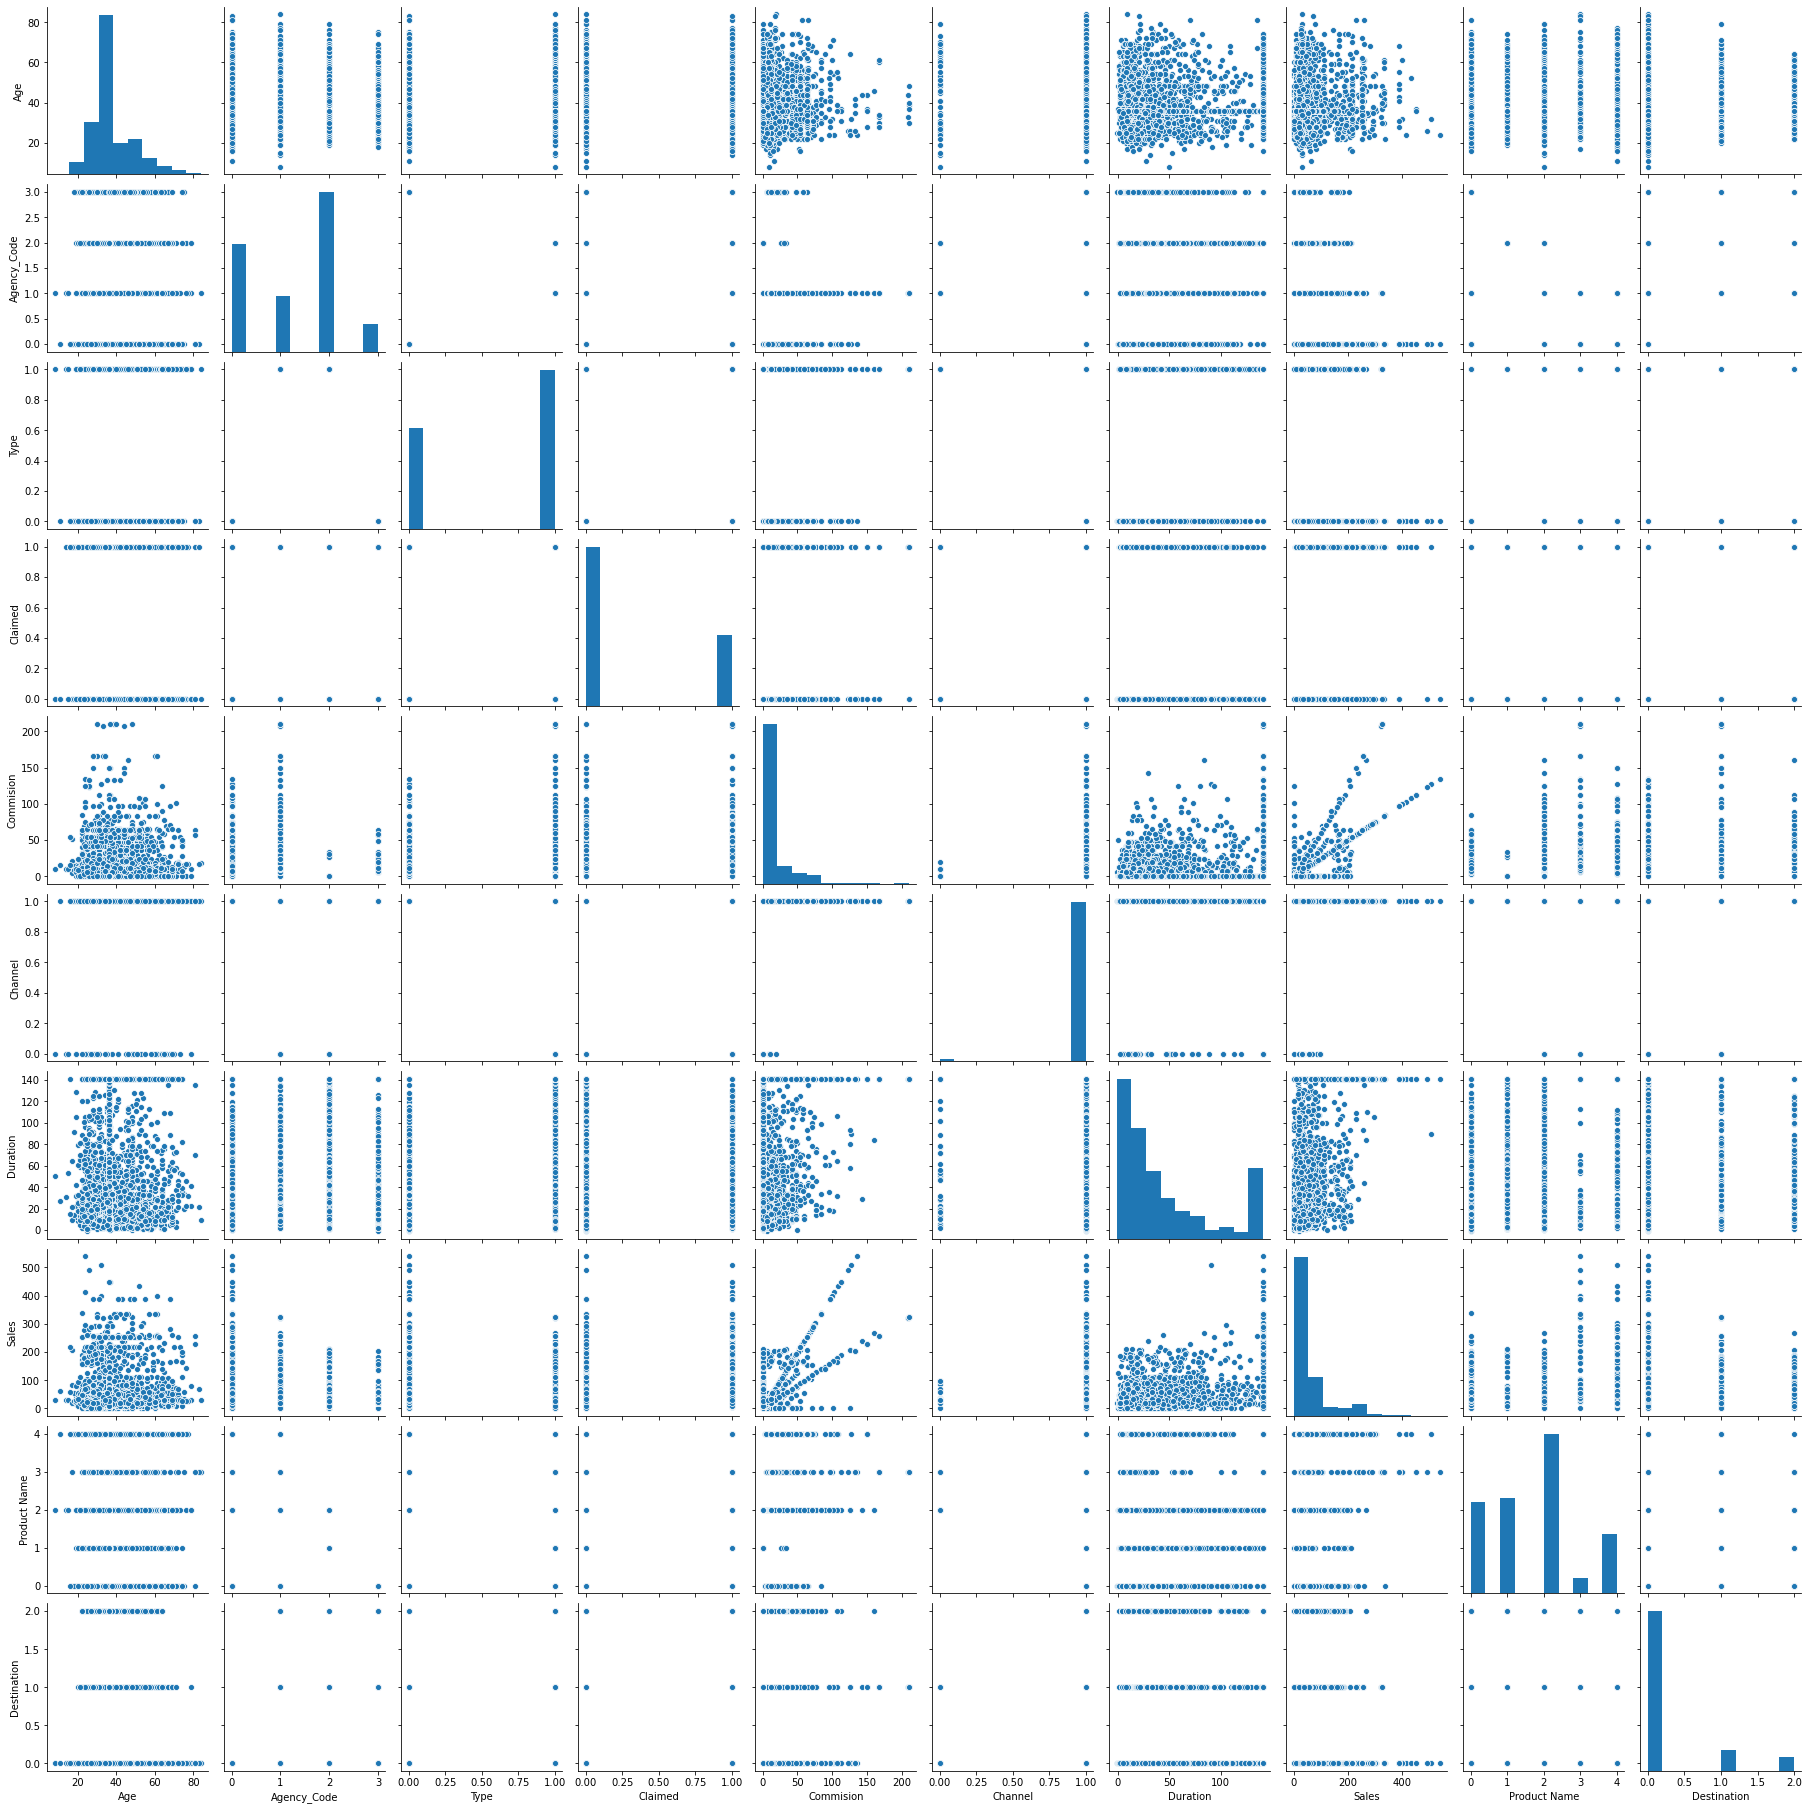

In [18]:
sns.pairplot(CRA)

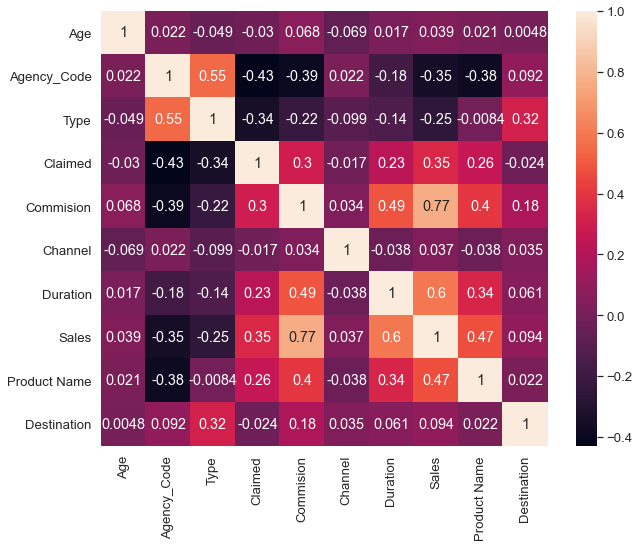

In [19]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(CRA.corr(), annot=True)

#### Solution 2.2 & 2.3

#### CART 

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
CRA1=CRA.copy()

In [192]:
#Extracting the target column into separate vectors for training set and test set
X = CRA1.drop("Claimed", axis=1)

y = CRA1.pop("Claimed")

In [193]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [194]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',900+2100)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


In [195]:
#Building And Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [196]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [197]:
from sklearn import tree

train_char_label = ['No', 'Yes']
CRA_Tree_File = open('CRA_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=CRA_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

CRA_Tree_File.close()

In [198]:
#Importance of variables in Tree Building
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.234486
Sales         0.212513
Agency_Code   0.198522
Age           0.197461
Commision     0.087195
Product Name  0.038694
Destination   0.021008
Channel       0.007757
Type          0.002363


In [199]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [ 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [200]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [201]:
grid_search.best_params_


{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 60}

In [202]:
best_grid = grid_search.best_estimator_

In [203]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=25,min_samples_split=60, random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=60,
                       random_state=1)

In [204]:
CRA_tree_regularized = open('CRA_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= CRA_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

CRA_tree_regularized.close()

In [205]:
print (pd.DataFrame(reg_dt_model.feature, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                   Imp
Agency_Code   0.545545
Sales         0.253814
Product Name  0.068832
Duration      0.060153
Age           0.051377
Commision     0.020279
Type          0.000000
Channel       0.000000
Destination   0.000000


### CART Model Performance Metrics

In [206]:
from sklearn.metrics import classification_report,confusion_matrix

In [207]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [208]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.70      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [209]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [210]:
confusion_matrix(train_labels, ytrain_predict)

array([[1320,  151],
       [ 269,  360]], dtype=int64)

In [211]:
confusion_matrix(test_labels, ytest_predict)

array([[555,  50],
       [166, 129]], dtype=int64)

In [212]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.8

In [213]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.76

In [214]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.57
cart_train_f1  0.63


In [215]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.44
cart_test_f1  0.54


AUC: 0.855


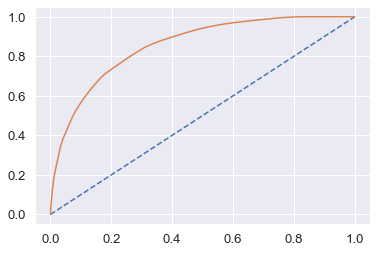

In [216]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.785


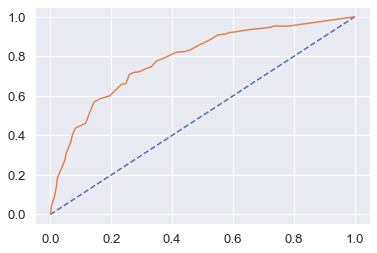

In [217]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Random Forest Classifier

In [218]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7],
    'max_features': [4,6],
    'min_samples_leaf': [25,30],
    'min_samples_split': [20,30],
    'n_estimators': [100,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv =3 )

In [219]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [4, 6],
                         'min_samples_leaf': [25, 30],
                         'min_samples_split': [20, 30],
                         'n_estimators': [100, 300]})

In [220]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 25,
 'min_samples_split': 30,
 'n_estimators': 100}

In [221]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=7, max_features=6, min_samples_leaf=25,
                       min_samples_split=30)

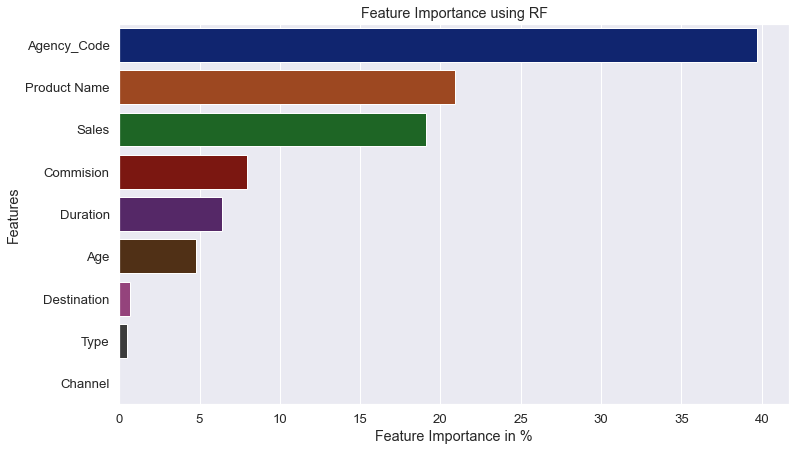

In [222]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

### Random Forest Classifier Model Prediction Metrics

In [223]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [224]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.74      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [225]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



In [226]:
confusion_matrix(train_labels,ytrain_predict)

array([[1327,  144],
       [ 260,  369]], dtype=int64)

In [229]:
confusion_matrix(test_labels,ytest_predict)



array([[552,  53],
       [157, 138]], dtype=int64)

In [227]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8076190476190476

In [228]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7666666666666667

In [230]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.59
rf_train_f1  0.65


In [231]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.47
rf_test_f1  0.57


Area under Curve is 0.855760927480846


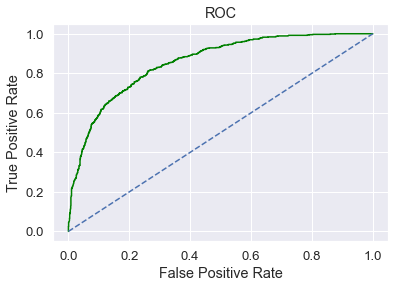

In [168]:
#AUC & ROC for Training Data
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.8203782042302844


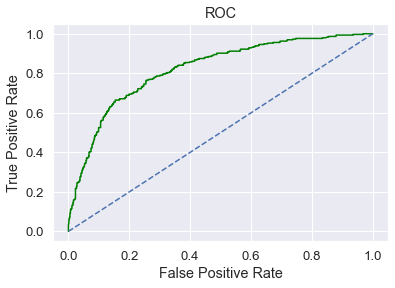

In [169]:
#AUC and ROC for the testing data
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### MLP Classifier (Artificial Neural Network)

In [170]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [171]:
param_grid = {
    'hidden_layer_sizes': [(300,500)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01, 0.001],
    'max_iter' : [5000, 10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [172]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(300, 500)],
                         'max_iter': [5000, 10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01, 0.001]})

In [173]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (300, 500),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [174]:
best_grid = grid_search.best_estimator_

### ANN Model Performance Metrics

In [175]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [176]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1471
           1       0.61      0.53      0.57       629

    accuracy                           0.76      2100
   macro avg       0.71      0.69      0.70      2100
weighted avg       0.75      0.76      0.75      2100



In [177]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       605
           1       0.67      0.48      0.56       295

    accuracy                           0.75       900
   macro avg       0.72      0.68      0.69       900
weighted avg       0.74      0.75      0.74       900



In [182]:
confusion_matrix(train_labels,ytrain_predict)

array([[1257,  214],
       [ 293,  336]], dtype=int64)

In [178]:
confusion_matrix(test_labels,ytest_predict)

array([[535,  70],
       [154, 141]], dtype=int64)

In [179]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7866666666666666

In [181]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7777777777777778

In [183]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.61
nn_train_recall  0.53
nn_train_f1  0.57


In [184]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.48
nn_test_f1  0.56


Area under Curve is 0.8238217623389775


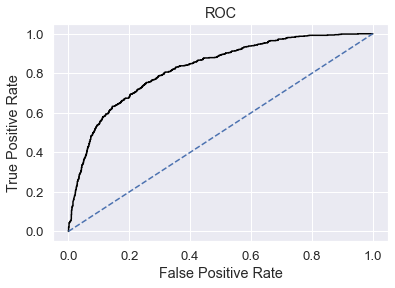

In [185]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

Area under Curve is 0.8026222159966381


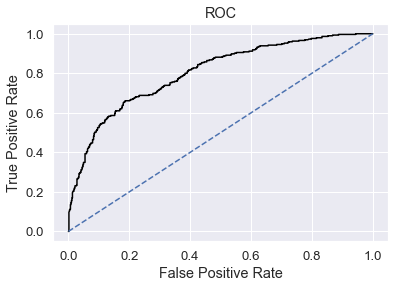

In [186]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

#### Solution 2.4

## Comparison of the performance metrics from the 3 models

In [187]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.76,0.81,0.77,0.79,0.78
AUC,0.85,0.79,0.86,0.82,0.82,0.80
Recall,0.57,0.44,0.58,0.47,0.53,0.48
Precision,0.70,0.72,0.72,0.73,0.61,0.67
F1 Score,0.63,0.54,0.64,0.57,0.57,0.56


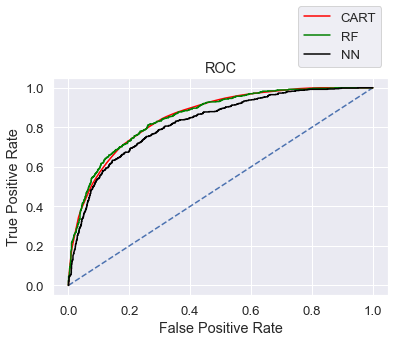

In [232]:
#ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

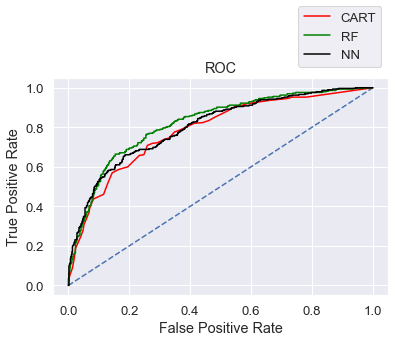

In [233]:
#ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
pd.Dataframe